In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [61]:
image = Image.open('Quiz.png')
im = np.array(image)

def resize(image, p):
    im = np.array(image)
    
    y,x,_ = im.shape
    
    h = np.int(np.floor(p*y))
    w = np.int(np.floor(p*x))
    
    return image.resize((w,h)).convert('L')

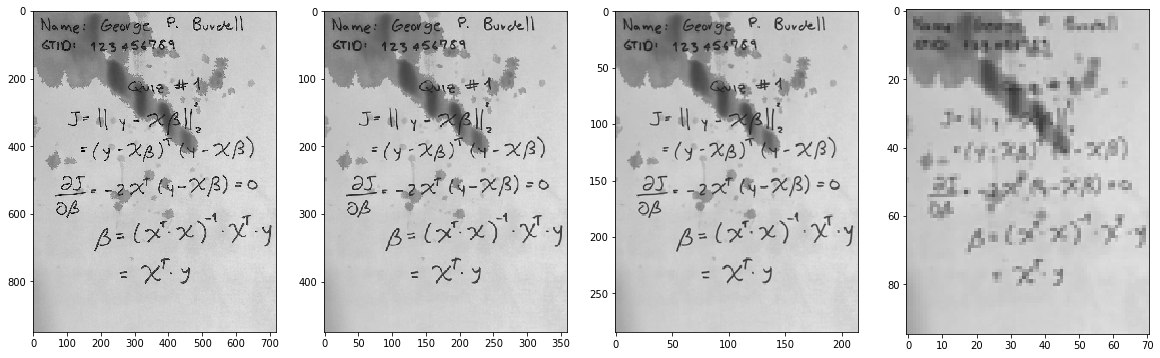

In [64]:
# part 1
fig, ax = plt.subplots(1, 4, figsize=(20,10))
images = []
for i,p in enumerate([1,.5,.3,.1]):
    new_image = resize(image, p)
    images.append(new_image)
    plot = ax[i].imshow(new_image, vmin=0, vmax=255, cmap="gray")
    

The above images show the original and resized images at 50, 30, and 10 percent the original pixel size, stretched to fit.

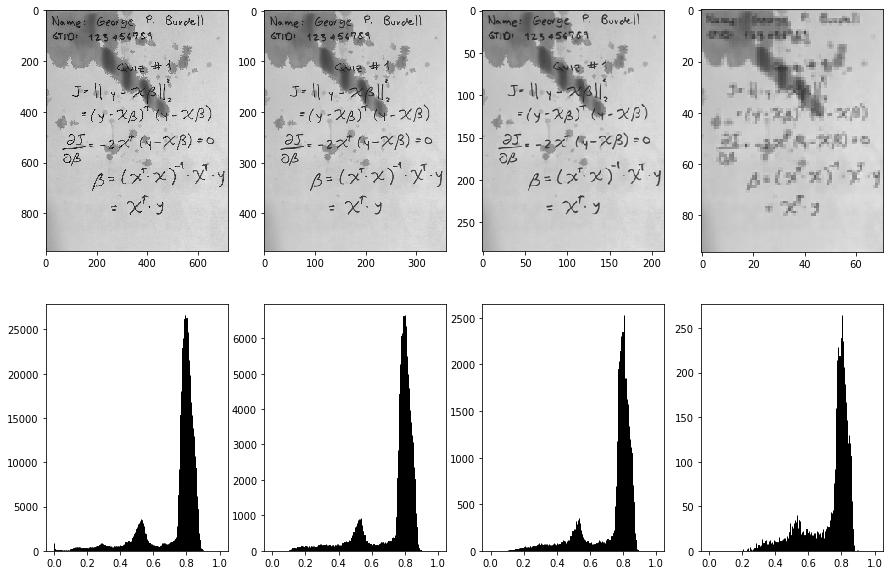

In [65]:
# part 2

fig, axs = plt.subplots(2, 4, figsize=(15,10))

def plot_row(ax,rows, images):
    bins = np.arange(0, 1, .001)
    for i,image in enumerate(images):
        I  = np.array(image)
        ax[0][i].imshow(image, vmin=0, vmax=255, cmap="gray")
        ax[1][i].hist((I.ravel()/255), bins=bins, range=(0.0, 1.0), fc='k', ec='k')
    
plot_row(axs,2, images)   

The above images show the original and resized images at 50, 30, and 10 percent the original pixel size, stretched to fit (top) with the corresponding histogram (bottom).  I would use the image at 30% the original size because its histogram maintains the same shape as the original, where the 10% image size starts to lose information on the left tail.  THis reduces the amount of data, but keeps as much information as possible.

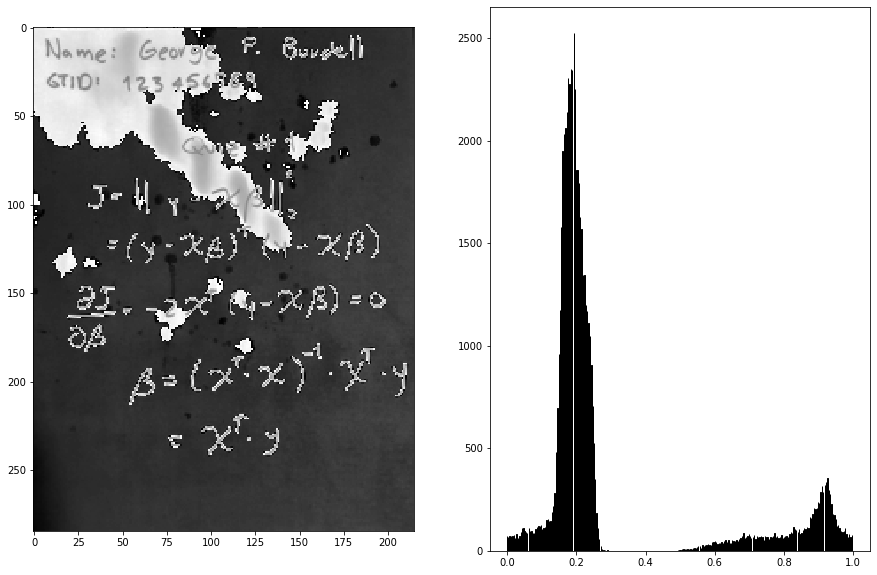

In [66]:
# part 3
image = images[2] # image scaled to 30%
I = np.array(image)
I_shift  = np.clip(I + 100, 0, 255)
bins = np.arange(0, 1, .001)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
p1 = ax1.imshow(I_shift, vmin=0, vmax=255, cmap="gray")
p2 = ax2.hist((I_shift.ravel()/255), bins=bins, range=(0.0, 1.0), fc='k', ec='k')


/home/jfftilton/anaconda3/envs/omsa/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.


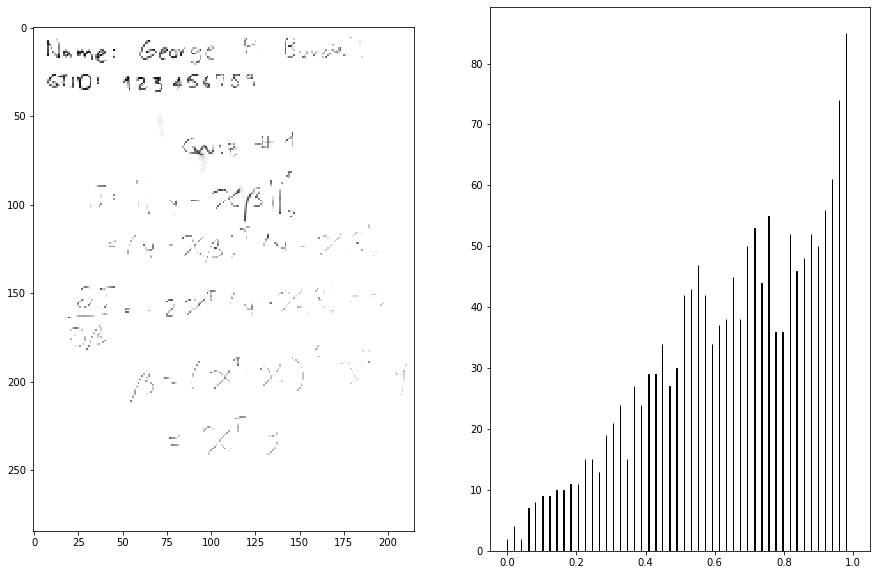

In [135]:
# part 4
mn = I.min()
mx = I.max()
I_stretch = np.clip((I-mn)/(mn-mx)*255, 0,255)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
p1 = ax1.imshow(I_stretch, vmin=0, vmax=255, cmap="gray")
p2 = ax2.hist((I_stretch.ravel()/255), bins=bins, range=(0.0, 1.0), fc='k', ec='k')


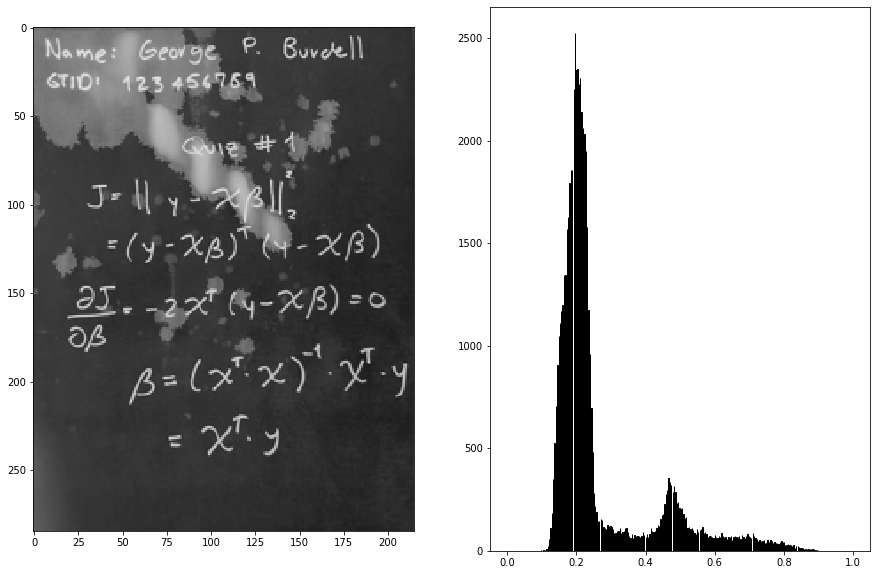

In [116]:
# part 5
I_inverse = 255 - I

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
p1 = ax1.imshow(I_inverse, vmin=0, vmax=255, cmap="gray")
p2 = ax2.hist((I_inverse.ravel()/255), bins=bins, range=(0.0, 1.0), fc='k', ec='k')


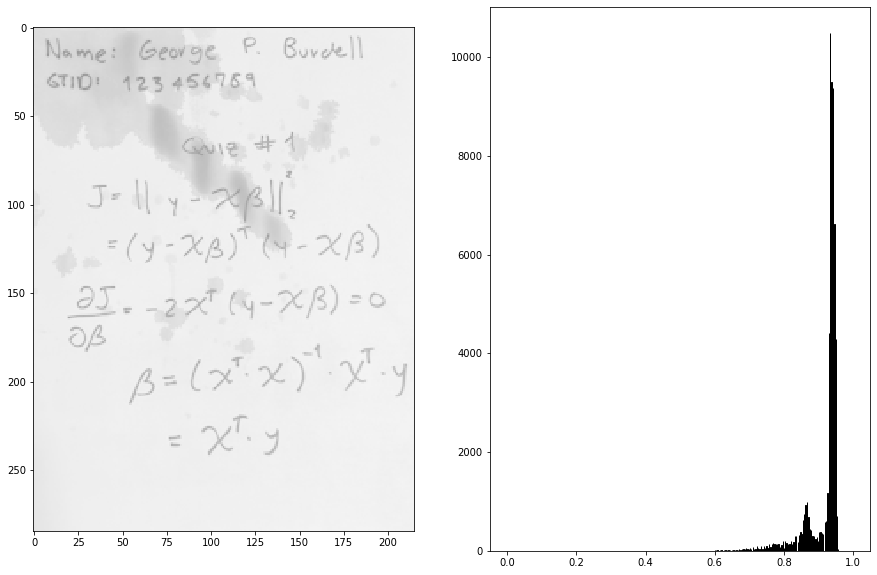

In [106]:
# part 6

I_log = (45 * np.log(I+1)).astype(int)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
p1 = ax1.imshow(I_log, vmin=0, vmax=255, cmap="gray")
p2 = ax2.hist((I_log.ravel()/255), bins=bins, range=(0.0, 1.0), fc='k', ec='k')

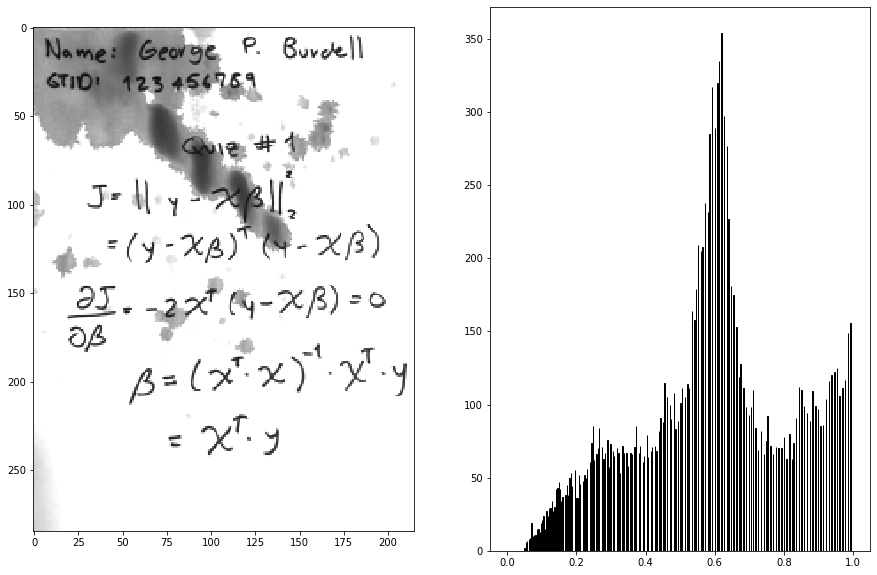

In [109]:
# part 7
I_pow = (I**1.5*.1).astype(int)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
p1 = ax1.imshow(I_pow, vmin=0, vmax=255, cmap="gray")
p2 = ax2.hist((I_pow.ravel()/255), bins=bins, range=(0.0, 1.0), fc='k', ec='k')

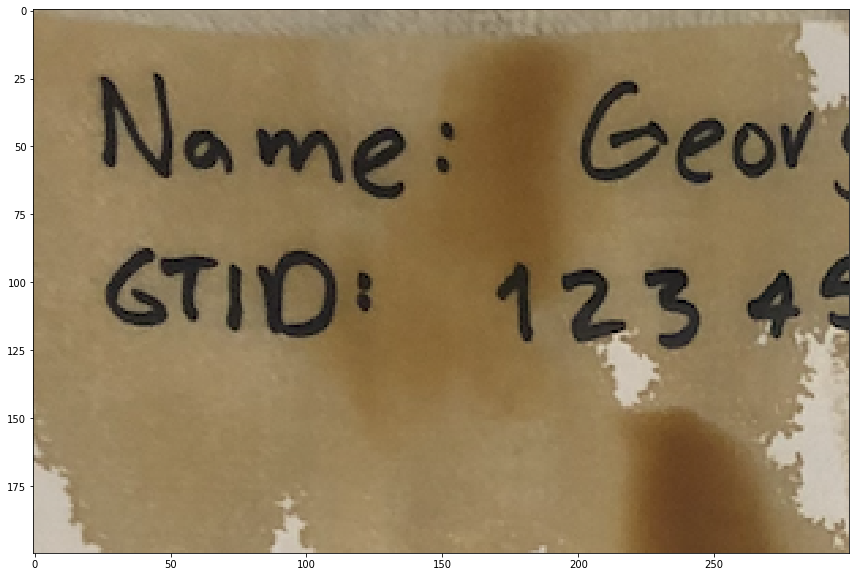

In [139]:
# part 8
image = Image.open('Quiz.png')
im = np.array(image)[:200,:300]
plt.figure(figsize = (15,10))
plt.imshow(im, interpolation='nearest',)



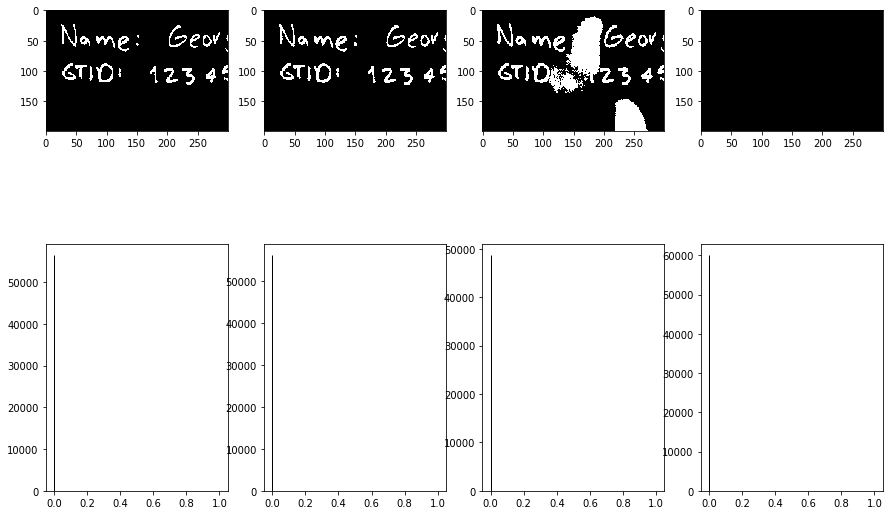

In [154]:
fig, axs = plt.subplots(2, 4, figsize=(15,10))

def plot_row(ax,rows, channels):
    bins = np.arange(0, 1, .001)
    for i in range(0,channels.shape[-1]):
        c = channels[:,:,i]
        c = np.where(c>60,0,255)
        ax[0][i].imshow(c, vmin=0, vmax=255, cmap="gray")
        ax[1][i].hist((c.ravel()/255), bins=bins, range=(0.0, 1.0), fc='k', ec='k')
    
plot_row(axs,2, im)   

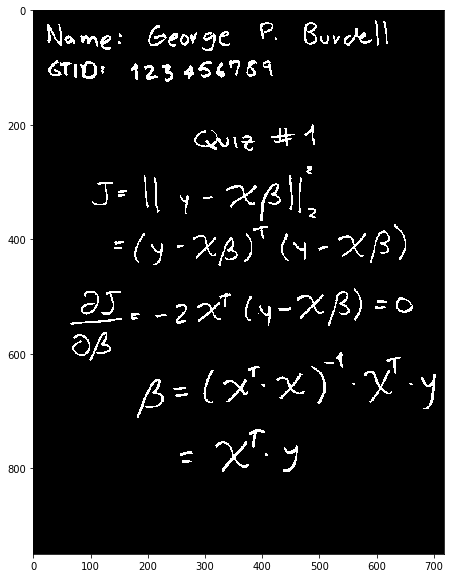

In [159]:
final =  np.array(Image.open('Quiz.png'))[:,:,0]
final = np.where(final>90,0,255)
plt.figure(figsize = (15,10))
imgplot = plt.imshow(final, vmin=0, vmax=255, cmap='gray')